In [88]:
from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider
import json

In [73]:
with open('qpu_keys.json', 'r') as keyfile:
    key = json.load(keyfile)['IonQ']

In [75]:
circuit = QuantumCircuit(2, 2)

In [76]:
circuit.h(0)
circuit.cx(0,1)

In [77]:
circuit.measure_all()

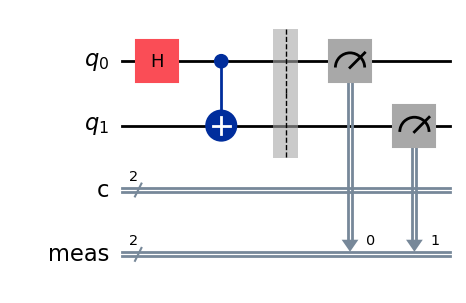

In [78]:
circuit.draw(output='mpl', style="iqp")

ionq

In [79]:
provider = IonQProvider(key)  # provider 가져오기

In [80]:
provider.backends()

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]

In [81]:
backend = provider.get_backend('ionq_simulator')

In [82]:
qpu_job = backend.run(circuit, shots=10)

In [83]:
dir(qpu_job)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_async',
 '_backend',
 '_client',
 '_execution_time',
 '_format_result',
 '_job_id',
 '_metadata',
 '_passed_args',
 '_result',
 '_status',
 'backend',
 'cancel',
 'cancelled',
 'circuit',
 'done',
 'extra_metadata',
 'extra_query_params',
 'get_counts',
 'get_probabilities',
 'in_final_state',
 'job_id',
 'metadata',
 'result',
 'running',
 'status',
 'submit',
 'version',
 'wait_for_final_state']

In [84]:
for i in ['backend', 
          'get_probabilities',
          'job_id','status','get_counts',
          'result'
          ]:
    answer = getattr(qpu_job, i)
    print(f"{i}: {answer()}  @@@@@@@@@@@@@@@@@")

backend: ionq_simulator  @@@@@@@@@@@@@@@@@
get_probabilities: {'00 00': 0.5, '11 00': 0.5}  @@@@@@@@@@@@@@@@@
job_id: 5f1817be-ba4b-463f-ac8c-5c158d7ab0d3  @@@@@@@@@@@@@@@@@
status: JobStatus.DONE  @@@@@@@@@@@@@@@@@
get_counts: {'00 00': 6, '11 00': 4}  @@@@@@@@@@@@@@@@@
result: Result(backend_name='ionq_simulator', backend_version='0.0.1', qobj_id='None', job_id='5f1817be-ba4b-463f-ac8c-5c158d7ab0d3', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 2, '0xc': 8}, probabilities={'0x0': 0.5, '0xc': 0.5}, metadata={'memory_slots': 4, 'global_phase': 0.0, 'n_qubits': 2, 'name': 'circuit-154', 'creg_sizes': [['c', 2], ['meas', 2]], 'clbit_labels': [['c', 0], ['c', 1], ['meas', 0], ['meas', 1]], 'qreg_sizes': [['q', 2]], 'qubit_labels': [['q', 0], ['q', 1]]}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['meas', 0], ['meas', 1]], creg_sizes=[['c', 2], ['meas', 2]], global_phase=0.0, memory_slots=4, n_qub

In [85]:
basis_gates = ['ccx', 'ch', 'cnot', 'cp', 'crx', 'cry', 'crz', 'csx', 'cx', 'cy', 'cz', 'h', 'i', 'id', 'mcp', 'mcphase', 'mct', 'mcx', 'mcx_gray', 'measure', 'p', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'toffoli', 'x', 'y', 'z']


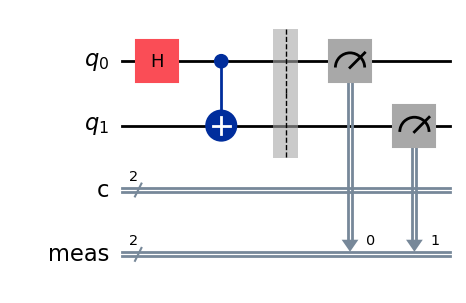

In [96]:
transpile(circuit, basis_gates=basis_gates, optimization_level=3).draw(output='mpl', style="iqp")

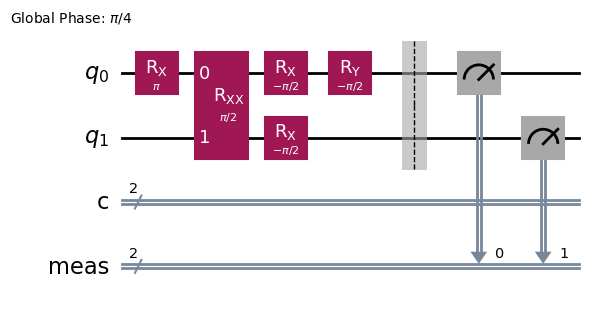

In [99]:
transpile(circuit, basis_gates=['rx', 'ry', 'rz', 'rxx', 'id']).draw(output='mpl', style="iqp")